<a href="https://colab.research.google.com/github/kotgirep/clusteringalgos/blob/main/255DBScanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CMPE-255 Assignment :DBScanClustering Algorithm

PyCaret is a Python-based low-code deep learning application that lets you to go from data preparation to model deployment in moments in your preferred notebooks environment.

Business Value: my business value is to find maximum credit score of a customer followed by annual income

I am using dataset of customers which has columns such as Gender,Age,Salary,Credit card score

Import the required libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import random 
from random import choice,shuffle
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D
import seaborn as sns

Install module pycaret

In [17]:
!pip install pycaret

     |████████████████████████████████| 266 kB 8.5 MB/s 
     |████████████████████████████████| 6.8 MB 22.8 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 113 kB 62.9 MB/s 
     |████████████████████████████████| 1.7 MB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 32.2 MB/s 
     |████████████████████████████████| 2.0 MB 22.5 MB/s 
     |████████████████████████████████| 261 kB 59.8 MB/s 
     |████████████████████████████████| 167 kB 53.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 675 kB 52.1 MB/s 
     |████████████████████████████████| 3.1 MB 57.3 MB/s 
     |████████████████████████████████| 303 kB 57.5 MB/s 
     |███████████████████

Import all the required dependancies

Data Loading

In [3]:
#Reading Data from the drive
customer_df = pd.read_csv("/content/data.csv")
#Read data
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Check the shape of Dataframe

In [5]:
customer_df.shape

(200, 5)

In [6]:
customer_df=customer_df.iloc[:,[3,4]].values

Scatter Plot Showing Maximum spending score vs Annual Income of A customer

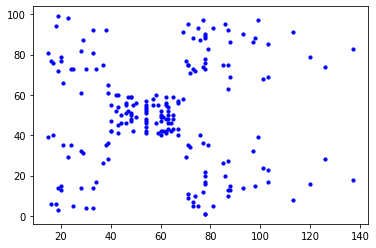

In [7]:
plt.scatter(customer_df[:,0],customer_df[:,1],s=10,c="blue")

Import Kmeans library 

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

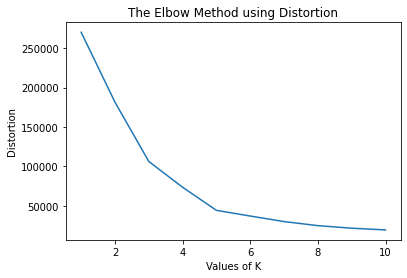

In [9]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10)
  kmeans.fit(customer_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [11]:
dbscan= DBSCAN(eps=5,min_samples=5)

In [12]:
labels=dbscan.fit_predict(customer_df)

In [28]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

Visualization of Data

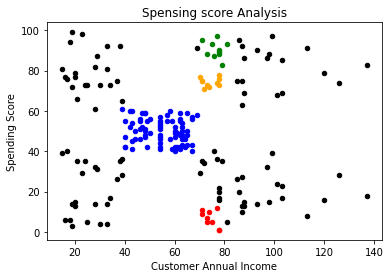

In [22]:
plt.scatter(customer_df[labels==-1,0],customer_df[labels==-1,1],s=20,c="black")

plt.scatter(customer_df[labels==0,0],customer_df[labels==0,1],s=20,c="black")
plt.scatter(customer_df[labels==1,0],customer_df[labels==1,1],s=20,c="blue")
plt.scatter(customer_df[labels==2,0],customer_df[labels==2,1],s=20,c="orange")
plt.scatter(customer_df[labels==3,0],customer_df[labels==3,1],s=20,c="red")
plt.scatter(customer_df[labels==4,0],customer_df[labels==4,1],s=20,c="green")
plt.scatter(customer_df[labels==5,0],customer_df[labels==5,1],s=20,c="yellow")
plt.scatter(customer_df[labels==6,0],customer_df[labels==6,1],s=20,c="grey")
plt.xlabel('Customer Annual Income')
plt.ylabel('Spending Score')
plt.title('Spensing score Analysis')
plt.show()